# ONLINE PAYMENT FRAUD DETECTION SYSTEM

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
data = pd.read_csv('dataset.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.shape

(6362620, 11)

In [4]:
# information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# mean, count , minimum and maximum values of the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Visualization

In [6]:
# count the columns with different datatypes like Category, Integer, Float.
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

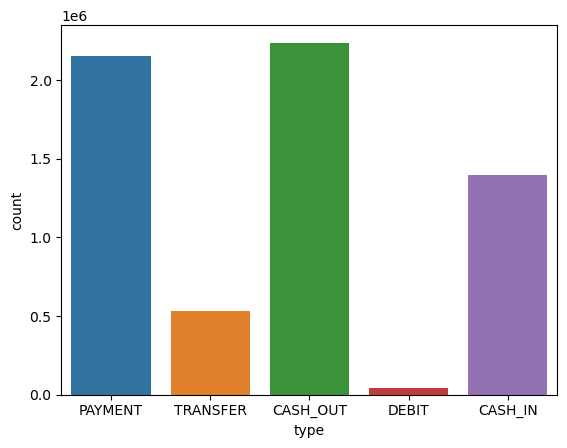

In [7]:
# count plot of the Payment type column using Seaborn library.
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

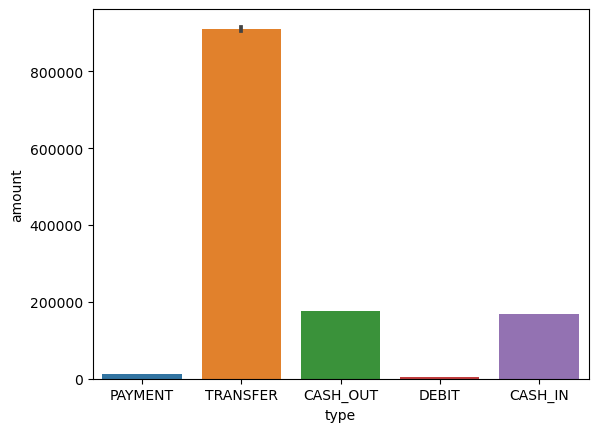

In [8]:
# bar plot for analyzing Type and amount column simultaneously
sns.barplot(x='type', y='amount', data=data)

In [9]:
# distribution of data among both the prediction values.
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
# Generating 25% sample of data frame
row1 = data.sample(frac = .25) 
row1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3671619,276,PAYMENT,11851.17,C362013023,0.00,0.00,M864297831,0.00,0.00,0,0
5184249,360,TRANSFER,172450.15,C2119994791,1419.00,0.00,C887295703,0.00,172450.15,0,0
1698794,159,CASH_IN,105927.46,C1694433495,6706007.65,6811935.11,C998143028,319597.58,213670.13,0,0
5019419,353,PAYMENT,12831.93,C2007383628,0.00,0.00,M401453758,0.00,0.00,0,0
3109042,235,PAYMENT,7262.12,C1318121248,0.00,0.00,M186981765,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
608259,34,TRANSFER,1234831.05,C1013319289,0.00,0.00,C570409417,1360242.97,2595074.03,0,0
765662,39,CASH_OUT,200648.38,C740061599,9562.00,0.00,C1312135910,1214916.15,1415564.53,0,0
4231448,306,CASH_IN,162569.20,C795286075,25877485.76,26040054.96,C1937064278,230195.30,67626.10,0,0
4673231,331,CASH_IN,149747.65,C1223134757,639.00,150386.65,C951542426,210349.46,60601.82,0,0


C:\Users\Aamina Akbar\AppData\Local\Temp\ipykernel_19772\131853721.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

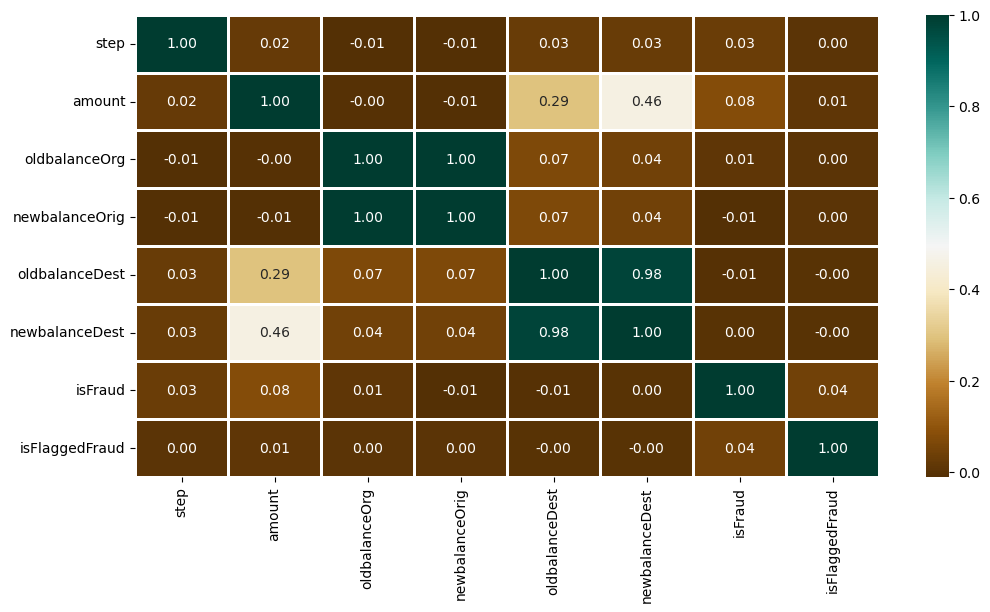

In [12]:
# correlation among different features using Heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# Data Preprocessing

In [13]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [14]:
# drop the irrelevant columns
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [15]:
X.shape, y.shape

((6362620, 11), (6362620,))

In [16]:
# split the data into 2 parts : Training and Testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Model Training

LogisticRegression , Decision Tree, RandomForestClassifier

In [17]:
# importing modules
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Random Forest

In [18]:
# train the model
# random forest
rf_model = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
rf_model.fit(X_train, y_train)

print("Random Forest:")
train_preds = rf_model.predict_proba(X_train)[:, 1]
rf_training_accuracy = ras(y_train, train_preds)
print('Training Accuracy : ', rf_training_accuracy)
# print('Training Accuracy : ', ras(y_train, train_preds))

y_preds = rf_model.predict_proba(X_test)[:, 1]
rf_validation_accuracy = ras(y_test, y_preds)
print('Validation Accuracy : ', rf_validation_accuracy)
# print('Validation Accuracy : ', ras(y_test, y_preds))

Random Forest:
Training Accuracy :  0.9999992846155892
Validation Accuracy :  0.9635718404867615


Logistic Regression

In [19]:
# LogisticRegression()
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

print("Logistic Regression: ")
train_preds = lr_model.predict_proba(X_train)[:, 1]
lr_training_accuracy = ras(y_train, train_preds)
print('Training Accuracy : ', lr_training_accuracy)
# print('Training Accuracy : ', ras(y_train, train_preds))

y_preds = lr_model.predict_proba(X_test)[:, 1]
lr_validation_accuracy = ras(y_test, y_preds)
print('Validation Accuracy : ', lr_validation_accuracy)
# print('Validation Accuracy : ', ras(y_test, y_preds))

Logistic Regression: 
Training Accuracy :  0.8873986280485237
Validation Accuracy :  0.884995827149426


Decision Tree

In [20]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

print("Decision Tree: ")
train_preds = dt_model.predict_proba(X_train)[:, 1]
dt_training_accuracy = ras(y_train, train_preds)
print('Training Accuracy : ', dt_training_accuracy)
# print('Training Accuracy : ', ras(y_train, train_preds))

y_preds = dt_model.predict_proba(X_test)[:, 1]
dt_validation_accuracy = ras(y_test, y_preds)
print('Validation Accuracy : ', dt_validation_accuracy)
# print('Validation Accuracy : ', ras(y_test, y_preds))

Decision Tree: 
Training Accuracy :  1.0
Validation Accuracy :  0.9389464428896231


<BarContainer object of 3 artists>

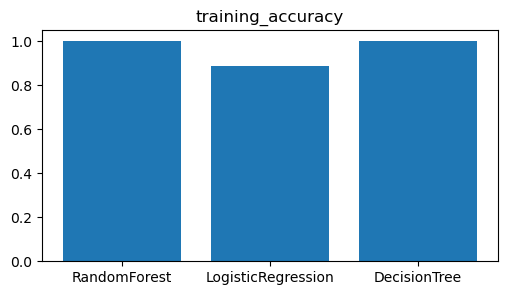

In [21]:
# bar plot for training accuracy of the three models
names = ['RandomForest', 'LogisticRegression', 'DecisionTree']
values = [0.9999992846155892, 0.8873986280485237, 1.0]
f = plt.figure(figsize =(20, 3), num = 10)
plt.subplot(131)
plt.title("training_accuracy")
plt.bar(names, values)

<BarContainer object of 3 artists>

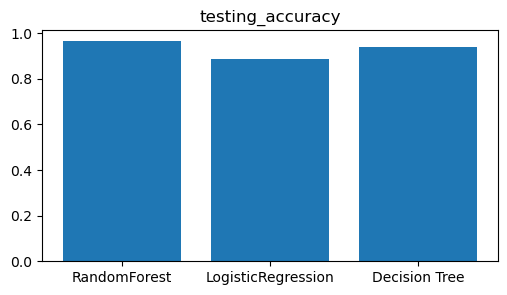

In [22]:
# bar plot for testing accuracy of the two models
names = ['RandomForest', 'LogisticRegression', 'Decision Tree']
values = [0.9635718404867615, 0.884995827149426, 0.9387392681122906]
f = plt.figure(figsize =(20, 3), num = 10)
plt.subplot(131)
plt.title("testing_accuracy")
plt.bar(names, values)

Ensemble Learning

In [23]:
# ensemble learning
from sklearn.ensemble import VotingClassifier
clf_voting_model = VotingClassifier(estimators=[('rf', rf_model), ('lr', lr_model), ('dt', dt_model)], voting='hard')
clf_voting_training_accuracy = VotingClassifier(estimators=[('rf', rf_training_accuracy), ('lr', lr_training_accuracy), ('dt', dt_training_accuracy)], voting='hard')
clf_voting_validation_accuracy = VotingClassifier(estimators=[('rf', rf_validation_accuracy), ('lr', lr_validation_accuracy), ('dt', dt_validation_accuracy)], voting='hard')

clf_voting_model.fit(X_train, y_train.astype(int))
print(clf_voting_model)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=7,
                                                     random_state=7)),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())])


In [24]:
mean_accuracy = clf_voting_model.score(X_test, y_test)
print("Overall accuracy of the model: ", mean_accuracy)

Overall accuracy of the model:  0.9997144782076147


# END OF THE PROJECT